# Patterns between Titanic's Passengers' Socio-economic Status and their Survival

Description from Kaggle:
*"The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class..."*

### Data Dictionary
**Variable**     |**Definition**     |**Key**
---|---|---|
surival|Survival|0 = No, 1 = Yes
pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd
sex|Sex
Age|Age in years
sibsp|\# of siblings / spouses aboard the Titanic
parch|\# of parents / children aboard the Titanic
ticket|Ticket number
fare|Passenger fare
cabin|Cabin Number
embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes
**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

Original files can be found here at Kaggle.(https://www.kaggle.com/c/titanic)

*Note:  data used in this analysis is a sample of the full data set.*  

## Questions

1. Is there a pattern between the passengers that survived and those that did not?
    * Does a passenger's socio-economic status increase a likelihood survival?
    * Does age and/or gender increase likelihood of survival?
    * Does having a higher number of family members aboard the Titanic show relate to survival?

## Variables to investigate
* Dependent:  a passenger's survival
* Independent:  
    1.  Gender
    2.  Passenger class
    3.  Age
    4.  \# of family members onboard the Titanic


## Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


**Initial loading of the data and observation:**

In [2]:
titanic_data = pd.read_csv('titanic-data.csv')

In [3]:
print len(titanic_data), 'passengers'
titanic_data.head(10)

891 passengers


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Data Set Errors
___

**Missing Age Data**

Above we see our dataset contains 891 records of passengers.  Initial screening of the data shows missing data in the columns 'Age' and 'Cabin', possibily due to unrecorded or loss of information as the data originated from 1912.  For the purpose of this analysis, cabin room number, ticket number, and fare will not be considered relevant to the survival of a passenger and will be removed.

The question still remains, what should be done with the missing 'Age' values?  We could estimate the ages to fill the missing data but then the validity of our analysis, statistical calculations and inferences made would constanly be opened to doubt.  In this analysis, we will opt to remove entire rows with missing 'Age' values, though still not without its cons as doing this will reduce the sample size for any statistical analysis involving age as a variable, therefore less reflective of the population.  But it is better to analyize with confident data than questionable data.  

In addition, we will combine the fields of 'SibSp' and 'Parch' into a new field, 'Totfam', which will be the total family members a person has onboard the ship.

In [4]:
# Removing non-relevant data fields and adding 'Totfam' column field.
titanic_df = titanic_data.drop(['Ticket', 'Fare', 'Cabin', 'PassengerId', 'Name'], 1)
titanic_df['Totfam'] = titanic_df['SibSp'] + titanic_df['Parch']

# Rows of missing numerical data will be removed using the method pandas.dataframe.dropna().
titanic_df_clean = titanic_df.dropna(axis=0, subset=['Age'])
print len(titanic_df) - len(titanic_df_clean), 'data lines removed.'
titanic_df_clean.head(15)

177 data lines removed.


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Totfam
0,0,3,male,22.0,1,0,S,1
1,1,1,female,38.0,1,0,C,1
2,1,3,female,26.0,0,0,S,0
3,1,1,female,35.0,1,0,S,1
4,0,3,male,35.0,0,0,S,0
6,0,1,male,54.0,0,0,S,0
7,0,3,male,2.0,3,1,S,4
8,1,3,female,27.0,0,2,S,2
9,1,2,female,14.0,1,0,C,1
10,1,3,female,4.0,1,1,S,2


**Next, we're going to check to make sure the columns 'Survived' and 'Pclass' only contain the expected values, 0 or 1 and 1,2, or 3, respectively.**  

In [5]:
print titanic_df_clean['Survived'].unique()
titanic_df_clean['Pclass'].unique()

[0 1]


array([3, 1, 2], dtype=int64)

## Investigating the data
___


### Passengers' Origins

In [6]:
# in anticipation of creating multiple pie charts, this function build a pie chart from 
# a data series called with the pandas.Series.value_counts method.
# column_labels arguement is a list.  It is recommended to first print the series values first to 
# see how the list should be ordered for correct labelling.   
def piechart(df, column_labels):
    return plt.pie(df, labels = column_labels, shadow=True,autopct='%1.1f%%')

The Titanic's voyage to New York began in Southampton, England on April 10, 1912 but not before making stops at Cherbourg, France and Queenstown (now known as Cobh), Ireland.  To get an idea of the composition of passengers and where they came from we look at the point of embarkation data.  

S    554
C    130
Q     28
Name: Embarked, dtype: int64


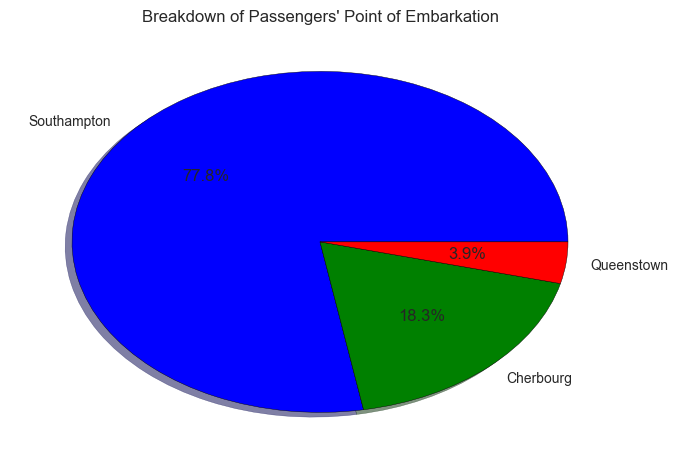

In [7]:
embarked_values = titanic_df_clean['Embarked'].value_counts()
print embarked_values
labels = ['Southampton', 'Cherbourg', 'Queenstown']
piechart(embarked_values, labels)
plt.title('Breakdown of Passengers\' Point of Embarkation')

Majority of passengers originated from Southampton, which is not surprising since the Titanic's voyage started from there. 

### Survivor Data
There were multiple critical safety issue that apparently was overlooked during the designing of the Titanic, one of them having insufficient life boats.  There were 20 boats, that could accomodate 1,178 people despite the ship faring 2,435 passengers and approximately 900 crew members, a total of more than 3,300 people.  Any sort of evacuation would have been doom from the start.  

So the question is, who were survivors?  Was it a "everyone for themselves" scenario or could there have been a methodical approach to the evacuation?  Here we look at the data to better understand the demographics of the passengers in relation to their survival.
___

**With more than 3,300 passengers but lifeboats only able to hold a 1,178, hypothetially only 35.7% would have been able to evacuate.  So how many actually did?  Out of the 714 sampled passengers, 290 (40.6%) survived.** 

0    424
1    290
Name: Survived, dtype: int64


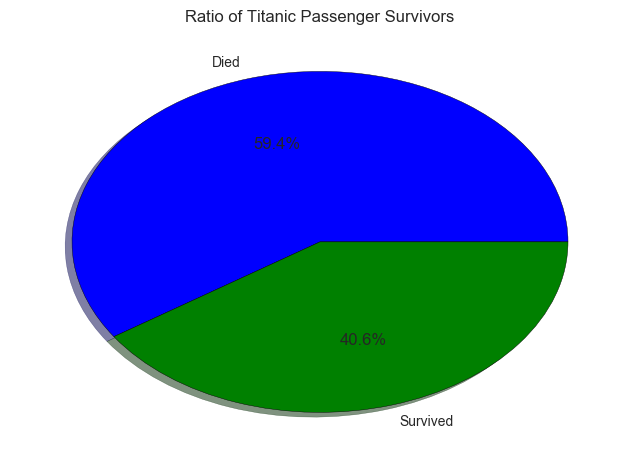

In [8]:
survivor_values = titanic_df_clean['Survived'].value_counts()
print survivor_values
labels = ['Died', 'Survived']
piechart(survivor_values, labels)
plt.title('Ratio of Titanic Passenger Survivors')

**There were three classes of passengers, class 1 being the highest and most expensive of fares.  To get a better idea who our survivors are we break down the survival data but also categorize them by class level.** 

**Of the 424 indivduals that died, 63.7% of them were in the lowest class (3) group, which is 76.1% of the total sampled class 3 passengers.  For comparison, 64 (34.4%) of total class 1 passengers died.**

In [9]:
by_survivor = titanic_df_clean.groupby('Survived')
print by_survivor['Pclass'].value_counts()
by_survivor['Pclass'].value_counts(3)

Survived  Pclass
0         3         270
          2          90
          1          64
1         1         122
          3          85
          2          83
Name: Pclass, dtype: int64


Survived  Pclass
0         3         0.636792
          2         0.212264
          1         0.150943
1         1         0.420690
          3         0.293103
          2         0.286207
Name: Pclass, dtype: float64

In [10]:
by_survivor['Pclass'].value_counts().unstack('Survived')

Survived,0,1
Pclass,,
1,64,122
2,90,83
3,270,85


Roughly we can see the data above to show a trend that survival was greater for higher class passengers but to better visualize the data we use the bar chart below.

**We see class 3 deaths were significantly more prominant than any other class.**

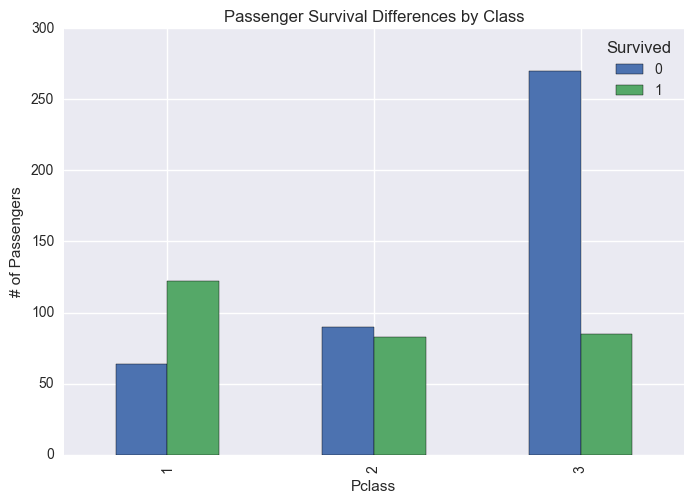

In [11]:
by_survivor['Pclass'].value_counts().unstack('Survived').plot(kind="bar")
plt.title('Passenger Survival Differences by Class')
plt.ylabel('# of Passengers')

**I was curious to know the average age of death onboard the Titanic.  We see it was age 30, too young in today's society.**

In [12]:
by_survivor['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

**To give us a visual of the age range of the passengers we use the following box plot, separating non-survivors and survivors.  Both groups have medians around upper 20s, although 50% of the surviving passengers' ages is comparably younger relative to non-survivors.  Suggestive that perhaps youth were given preference for evacuation.** 

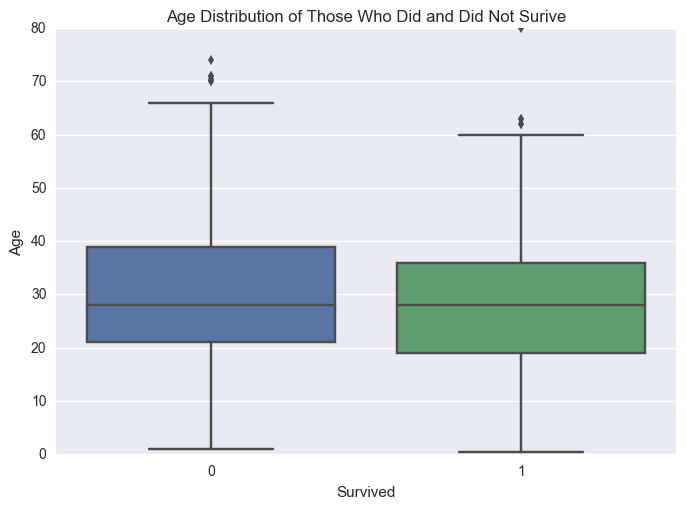

In [13]:
sns.boxplot(x = 'Survived', y = 'Age', data = titanic_df_clean)
plt.title('Age Distribution of Those Who Did and Did Not Surive')

___
**The youngest to have died from the titanic tragedy was just one year old...**

In [14]:
by_survivor['Age'].min()

Survived
0    1.00
1    0.42
Name: Age, dtype: float64

So we know between classes the survival ration was greater in higher levels.  But lets go deeper.  Societal norms continue to emphasize the action of proteting females during times danger.  Did the passengers of Titanic follow that same mentality?

**The swarmplot below shows the age group of those who died aggregates between age 20-30.  Similarly, the ages of the survivors too aggregate toward the younger range but with an even younger lower-end from around ages 10.  In short, survivors were mainly composed of women and children, although we cannnot yet say if there was an intentional preference.**

In [15]:
def swarmplot(df, xColumn, yColumn, hue):
    return sns.swarmplot(x = xColumn, y = yColumn, hue = hue, data = df)

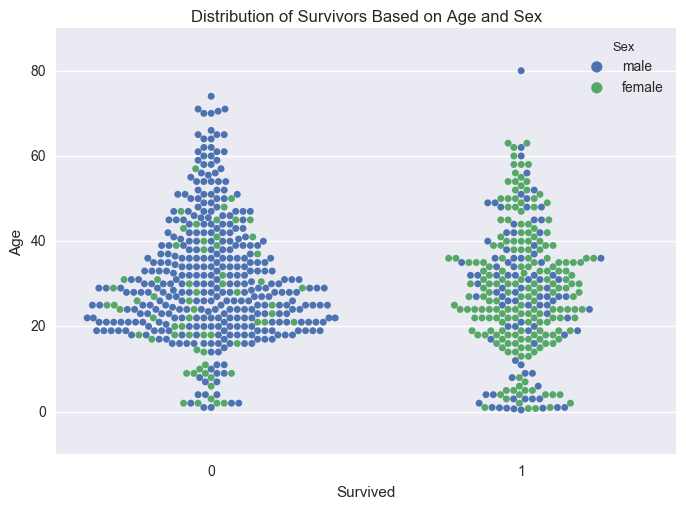

In [16]:
swarmplot(titanic_df_clean, 'Survived', 'Age', 'Sex')
plt.title('Distribution of Survivors Based on Age and Sex')

But perhaps there is another variable to consider, its likely passengers also travelled with family and perhaps the number of family members aboard played a factor in determining lifeboat survivorship.

**Here we compare the 'Survived' data between their total family members, number of siblings/spouses, and number of parent/child relations values.**

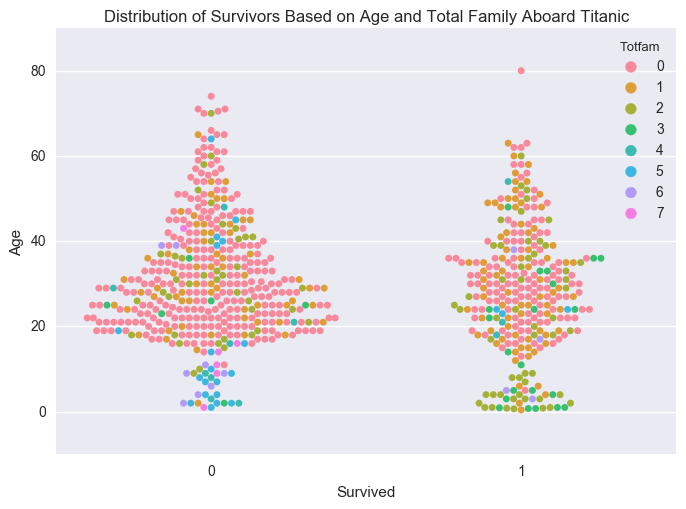

In [17]:
swarmplot(titanic_df_clean, 'Survived', 'Age', 'Totfam')
plt.title('Distribution of Survivors Based on Age and Total Family Aboard Titanic')

So, total family size showed no observable pattern.  Maybe if we specifically viewed family count size by sibling/spouses?

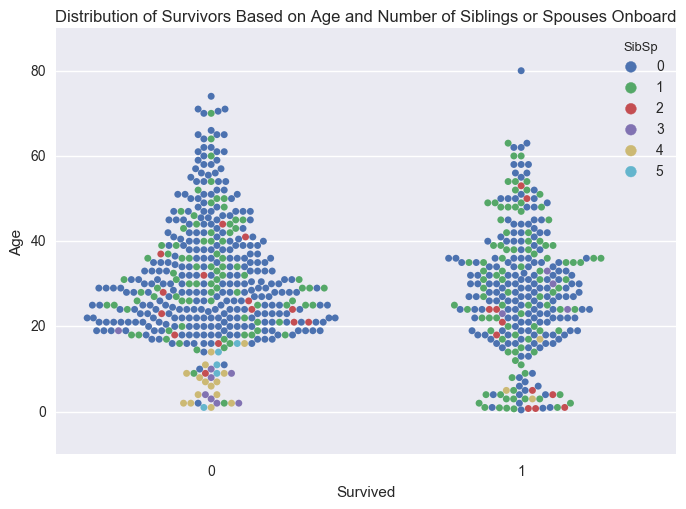

In [18]:
swarmplot(titanic_df_clean, 'Survived', 'Age', 'SibSp')
plt.title('Distribution of Survivors Based on Age and Number of Siblings or Spouses Onboard')

No clearn pattern either, perhaps relations between parent/child influenced lifeboat ridership?

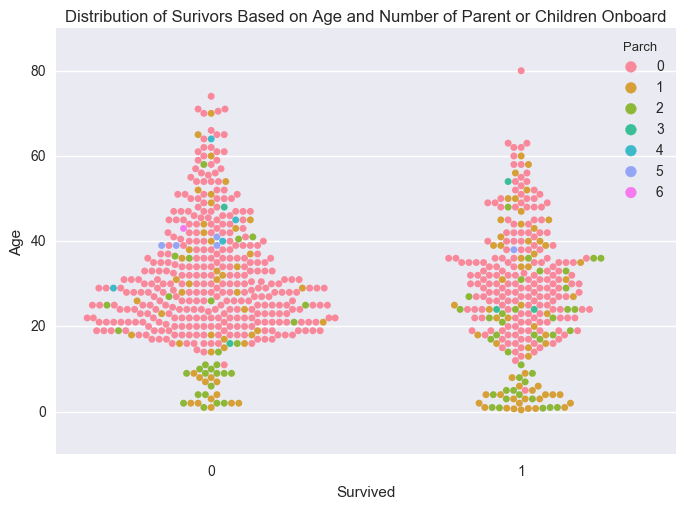

In [19]:
swarmplot(titanic_df_clean, 'Survived', 'Age', 'Parch')
plt.title('Distribution of Surivors Based on Age and Number of Parent or Children Onboard')

No clear pattern either, all charts above show familial relations data to be widely dispersed and it seems the majority of passengers were onboard the ship alone.

___
We now have a sense that the survivors were mainly comnposed of women but specifically how much?  

**Of 261 females, 197 (75.5%) survived.  Out of 453 males, 360 (79.5%) did not...**

Sex     Survived
female  1           197
        0            64
male    0           360
        1            93
Name: Survived, dtype: int64
Sex     Survived
female  1           0.754789
        0           0.245211
male    0           0.794702
        1           0.205298
Name: Survived, dtype: float64


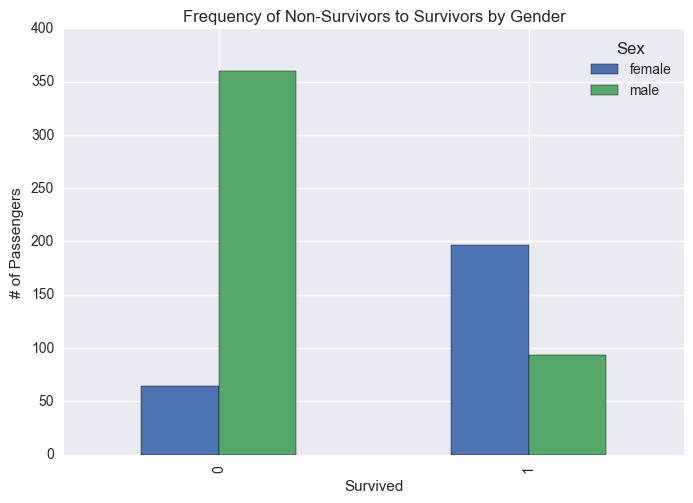

In [20]:
by_gender = titanic_df_clean.groupby('Sex')
print by_gender['Survived'].value_counts()
print by_gender['Survived'].value_counts(1)
by_gender['Survived'].value_counts().unstack('Sex').plot(kind='bar')
plt.title('Frequency of Non-Survivors to Survivors by Gender')
plt.ylabel('# of Passengers')


At this point we know that upper class passengers and females had a higher rate of survival, so what exactly what was the breakdown of female survivors within each class?  Was there an equal proportion of females evacuated in all class groups or do we again see class imbalance?

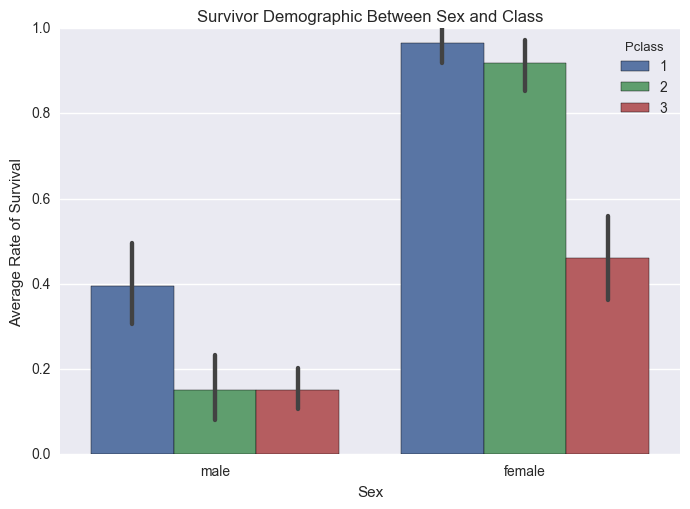

In [21]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=titanic_df_clean).set(ylabel = 'Average Rate of Survival')
plt.title('Survivor Demographic Between Sex and Class')

Above we revisit the survivor data; between life or death, again we see higher socio-economic classes had the highest number of survivors, which significantly increases in the female group.  What stands out though is that overall, women between classes did not equally survive; class 3 females survived only half as much as class 1.

We begin to see a picture of our survivors, mainly that they were young females of higher socio-economic background.

### Passenger Data
___

### Ticket Class Breakdown
**Of the 714 sampled passengers, 186 (26.1%) were 1st class, 173 (24.2%) were 2nd class, and 355 (49.7%) were in 3rd class.**

3    355
1    186
2    173
Name: Pclass, dtype: int64


([<matplotlib.patches.Wedge at 0xddf5240>,
  <matplotlib.text.Text at 0xde210f0>])

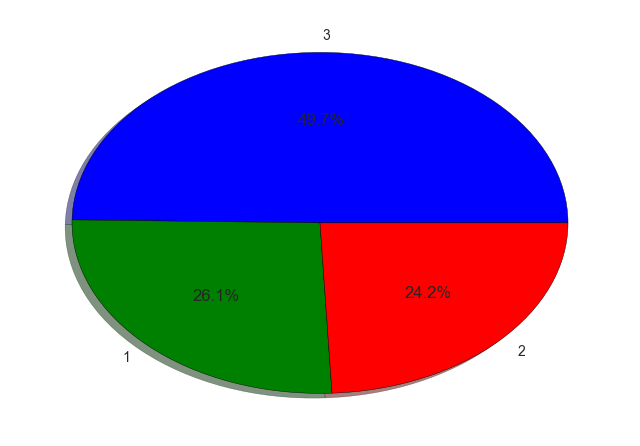

In [22]:
class_breakdown = titanic_df_clean['Pclass'].value_counts()
print class_breakdown
labels = ['Class 3', 'Class 1', 'Class 2']
piechart(class_breakdown, labels)
plt.title('Passenger Demographics by Class')

**Out of 714 passengers, 453 (63.4%) were males, 261 (36.6%) were female.**

Total Passengers: 714
male      453
female    261
Name: Sex, dtype: int64


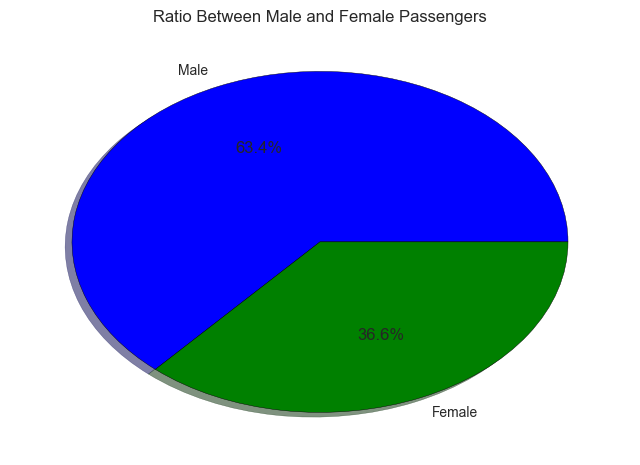

In [23]:
print 'Total Passengers:', len(titanic_df_clean)
gender_values = titanic_df_clean['Sex'].value_counts()
print gender_values
labels = ['Male', 'Female']
piechart(gender_values, labels)
plt.title('Ratio Between Male and Female Passengers')

**The average passenger age was 29, with the youngest passenger less than a year old, the oldest 80.**

In [24]:
titanic_df_clean['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

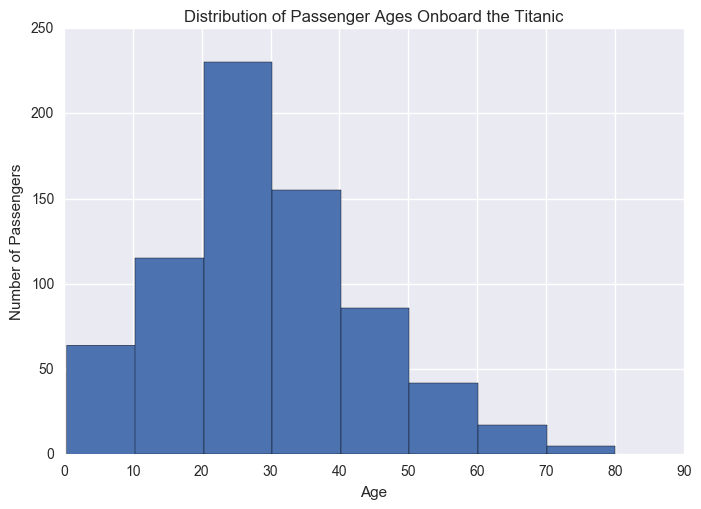

In [25]:
titanic_df_clean['Age'].hist(bins=8)
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passenger Ages Onboard the Titanic')

## Conclusion
___

Although statistical analysis is yet to be done to identify causation and correlation, the data does have a observable pattern.  When evacuating the damaged ship, younger passengers, especially women and children had a higher average number of survivors.  Suggesting they may been given priority for evacuation.   

What is quite interesting is the 'Survived' data field shows a trend towards those of higher socio-economic status.  In this case, Passenger Class can be used to infer social status, Class 1 being the "Upper" class, with Class 3 being the lowest.  Within each class group, 34.4% died out of 186 sampled Class 1 passengers, while Class 3 passengers was 76.1%, more than double Class 1 passengers.  Why this is, we can't be sure but given the time period it wouldn't be hard to imagine the Titanic's crew prioritizing Class 1 individuals.  But then again, perhaps Class 3 passengers didn't make it to the top of the ship to be rescued as their rooms were located toward the bottom of the ship where damage made by contact with the iceburg was worst and flooding would have been fastest.

Though we must keep in mind this is a sample of 714 passengers, when the total passenger count was 2224.  In addition, for this dataset 177 values within the 'Age' field were missing out of the initial 891 sample, about 20%, which makes this analysis less representive of the actual passenger population, although in my opinion better than extrapolating the missing values.  We should be aware this weakness when making inferences involving age in this analysis and may be skewed, depending on what the actual age values of the missing data were.  

In [26]:
print len(titanic_df) - len(titanic_df_clean), 'data lines removed due to missing age values.'

177 data lines removed due to missing age values.


## References
___

* Original files can be found here at Kaggle.(https://www.kaggle.com/c/titanic)
* History.com Staff. "Titanic".  *History.com*, A+E Networks, 2009, Sept 1, 2017, http://www.history.com/topics/titanic
* pandas.pydata.org
* seaborn.pydata.org (http://seaborn.pydata.org/tutorial/categorical.html)
* Ashutosh Singh - Udacity Mentor for Data Analyst Nanodegree.  Thank you for the tips on the plot functions.  
